# *Bean* There, Done That, *Brew*(Bro): Predicting the Quality of Coffee Taste from Cupping Score Features Using the k-Nearest Neighbor (kNN) Classification Algorithm

**BY:** <br> 
Baguio, Christian Jay <br>
Bandivas, Roxanne Mae <br>
Barrio, Reyjane Mae <br>
Palmes, Jhibsam <br>
Sabacajan, Cle Michael <br>
Tapao, Mark Vincent

**Course:** Machine Learning <br/>
**Program & Section:** BS in Data Science - DS3A

## **☕Introduction**

Coffee connoisseurs consider identifying the various subtleties of flavor, fragrance, and overall quality to be an art form. With the increasing demand for specialized coffee experiences, both consumers and producers are continuously looking for ways to assure consistency and perfection in every cup. However, in the quest of coffee perfection, difficulties occur in properly analyzing and forecasting the quality of coffee flavor, which frequently relies on subjective assessments or complicated sensory analysis. While cupping scores, a standardized method for evaluating coffee quality, provide some objectivity, the practice is labor-intensive and requires the knowledge of skilled cuppers. As a result, access to consistent and reliable assessments of coffee taste quality remains limited, hindering both producers and consumers in their quest for the perfect cup.

By utilizing the power of data science and machine learning, our initiative intends to improve the way coffee quality is evaluated and predicted. We specifically focus on using the k-Nearest Neighbor (kNN) classification method to examine cupping score characteristics, resulting in an extensive model for predicting coffee flavor and quality. This new technique enables coffee fans and prospective coffee entrepreneurs to make better informed decisions, ensuring that every sip provides a wonderful sensory experience.

## **☕Data Discussion**

These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers.

<br>

**Features and Attributes:**

**Certification Information** <br>
`Country of Origin:` The country where the coffee beans were grown. <br>
`Farm Name:` The name of the farm where the coffee beans were produced. <br>
`Lot Number:` The unique identifier for a specific lot of coffee beans. <br>
`Mill:` The mill or processing facility where the coffee beans were processed. <br>
`ICO Number:` The International Coffee Organization (ICO) number associated with the coffee. <br>
`Company:` The company or organization responsible for the coffee. <br>
`Altitude:` The altitude at which the coffee beans were grown. <br>
`Region:` The region or geographical area where the coffee beans were produced. <br>
`Producer:` The individual or entity that produced the coffee beans. <br>
`Number of Bags:` The total number of bags of coffee beans. <br>
`Bag Weight:` The weight of each bag of coffee beans. <br>
`In-Country Partner:` The local partner or representative involved in the coffee certification process. <br>
`Harvest Year:` The year when the coffee beans were harvested. <br>
`Grading Date:` The date when the coffee beans were graded. <br>
`Owner:` The owner or owner's representative of the coffee beans. <br>
`Variety:` The variety or type of coffee beans. <br>
`Status:` The status or condition of the coffee beans. <br>
`Processing Method:` The method used to process the coffee beans. <br>

**Cupping Scores** <br>
`Aroma:` The score or rating for the aroma of the coffee. <br>
`Flavor:` The score or rating for the flavor of the coffee. <br>
`Aftertaste:` The score or rating for the aftertaste of the coffee. <br>
`Acidity:` The score or rating for the acidity of the coffee. <br>
`Body:` The score or rating for the body or mouthfeel of the coffee. <br>
`Balance:` The score or rating for the balance of the coffee's flavors. <br>
`Uniformity:` The score or rating for the uniformity of the coffee. <br>
`Clean Cup:` The score or rating for the cleanliness of the coffee. <br>
`Sweetness:` The score or rating for the sweetness of the coffee. <br>
`Total Cup Points:` The total score or rating for the coffee based on cupping evaluation. <br>
`Overall:` The overall score or rating for the coffee. <br>

**Green Analysis** <br>
`Moisture:` The moisture content of the green coffee beans. <br>
`Color:` The color of the green coffee beans. <br>
`Defects:` The number of defects found in the coffee beans, numbers of full defects are calculated on a basis of 350 grams of green coffee sample. <br>
`Category One Defects:` The number of defects categorized as "Category One." Identified as full black or sour bean, pod/cherry, and large or medium sticks or stones. <br>
`Category Two Defects:` The number of defects categorized as "Category Two." Identified as parchment, hull/husk, broken/chipped, insect damage, partial black or sour, shell, small sticks or stones, water damage. <br>
`Quakers:` The presence or number of quaker beans, which are underdeveloped or defective beans. <br>

**Sample Information** <br>
`Expiration:` The expiration date of the coffee certification. <br>
`Certification Body:` The organization responsible for certifying the coffee. <br>
`Certification Address:` The address of the certification body. <br>
`Certification Contact:` The contact information for the certification body. <br>

<br>

**Citation** 

ehmtang. (2023). Coffee Quality Institute Arabica Reviews May2023. (<a href="https://www.kaggle.com/datasets/erwinhmtang/coffee-quality-institute-reviews-may2023/data">Kaggle.com</a>) <br>
Coffee Quality Institute, & Eximware Inc. (2014). Home - Q Coffee System. (<a href="https://database.coffeeinstitute.org/">Coffeeinstitute.org</a>) <br>

### 🔃 Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### 📩 Load Dataset

In [3]:
df = pd.read_csv('coffee.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'coffee.csv'

### 🔎 Data Understanding

In [1]:
#Get information about the dataset.
df.info()

NameError: name 'df' is not defined

In [ ]:
#check for null values.
cq_df.isna().sum()

In [ ]:
df.shape
df.columns

### 🖩 Calculate the percentage of missing values

In [ ]:
#check percentage for Status.
Status_nan_percentage = cq_df.Status.isna().sum()/len(cq_df)*100
"{} % of values in status columns are missing".format(round(Status_nan_percentage, 2))

In [ ]:
#check percentage for Defects.
Defects_nan_percentage = cq_df.Defects.isna().sum()/len(cq_df)*100
"{} % of values in defects columns are missing".format(round(Defects_nan_percentage, 2))

This indicates that majority values of status and defects are missing. Best approach for this one is to remove from the dataset.

In [ ]:
df.drop(['Status','Defects'], axis = 1, inplace = True)

### **🔎 Examine Dataset (EDA)**

### 🖩 Data Imputation

In [ ]:
#Fill each attributes with nan values with their mean values
df = df.fillna(df.mean())

In [ ]:
#check for duplicated data
df.loc[df.duplicated()]

In [ ]:
#check for duplicated values in coffee id
df.loc[df.duplicated(subset = ['coffee_id'])].head(5)

In [ ]:
#check for duplicate instances in coffee id.
df.query('coffee_id == 781706')

## 🔎 Descriptive Statistics

Summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [8]:
cupping_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Aroma,1509.0,7.585991,0.371316,0.0,7.42,7.58,7.75,8.75
Flavor,1509.0,7.548615,0.393472,0.0,7.33,7.58,7.75,8.83
Aftertaste,1509.0,7.425964,0.396179,0.0,7.25,7.42,7.67,8.67
Acidity,1509.0,7.554758,0.371626,0.0,7.33,7.58,7.75,8.75
Body,1509.0,7.534791,0.347488,0.0,7.33,7.50,7.75,8.58
Balance,1509.0,7.535726,0.391863,0.0,7.33,7.58,7.75,8.75
Uniformity,1509.0,9.853930,0.525392,0.0,10.00,10.00,10.00,10.00
Clean_Cup,1509.0,9.855017,0.721136,0.0,10.00,10.00,10.00,10.00
Sweetness,1509.0,9.915964,0.495834,0.0,10.00,10.00,10.00,10.00
Total_Cup_Points,1509.0,82.333612,3.378540,0.0,81.42,82.67,83.83,90.58


Above, we have a table showing the descriptive analysis of the attributes and its instances of the dataset used. Let us examine the attributes one by one.

1. Aroma: <br>
    > The average percentage aroma rating is 7.5. The standard deviation is at 0.37. The minimum is 0 while the maximum rating is at 8.75. 25% of aroma rating rated 7.4, 50% of aroma rating rated 7.5, and 75% of the aroma rating rated 7.7.
<br>
2. Flavor: <br>
    > The average rating for the flavor of the coffee is 7.54. The standard deviation is 0.39. the minimum is 0 while the maximum flavor rate is 8.83. 25% of the flavor rated 7.3, 50% of the flavor rated 7.5, and 75% of the flavor rated 7.75.
<br>
3. Aftertaste: <br>
    > The average rating for the aftertaste of the coffee is 7.4. The standard deviation is at 0.40. The minimum 0 while the maximum aftertaste rating is 8.6. 25% rated 7.2, 50% rated 7.4, and 75% rated 7.6.
<br>
4. Acidity: <br>
    > The average rating for the acidity of the coffee is 7.5. The standard deviation is at 0.37. The minimum 0 while the maximum aftertaste rating is 8.7. 25% rated 7.3, 50% rated 7.5, and 75% rated 7.7.
5. Overall: <br>
    > The average overall score or rating for the coffee is 7.5. The standard deviation is at 0.45. The minimum 0 while the maximum overall rating is 10. 25% rated 7.3, 50% rated 7.5, and 75% rated 7.7.

In [ ]:
#function for checking mean, median, and mode
def C_rating():
  print('Cupping evaluation mean: ', df['Total_Cup_Points'].mean())
  print('Cupping evaluation  median: ', df['Total_Cup_Points'].median())
  print('Cupping evaluation  mode: ', df['Total_Cup_Points'].mode())

C_rating()

### 💡Feature Understanding

In [3]:
certification_info = df[['Country_of_Origin', 'Farm_Name', 'Lot_Number', 'Mill', 'ICO_Number', 'Company', 'Altitude', 'Region',
                         'Producer', 'Number_of_Bags', 'Bag_Weight', 'In_Country_Partner', 'Harvest_Year', 'Grading_Date', 
                         'Owner', 'Variety', 'Color', 'Moisture', 'Processing_Method']]

cupping_scores = df[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean_Cup', 
                     'Sweetness', 'Total_Cup_Points', 'Overall']]

green_analysis = df[['Category_One_Defects', 'Category_Two_Defects', 'Quakers']]

sample_info = df[['Expiration', 'Certification_Body', 'Certification_Address', 'Certification_Contact']]

In [4]:
cupping_scores['Overall'].nunique()

42

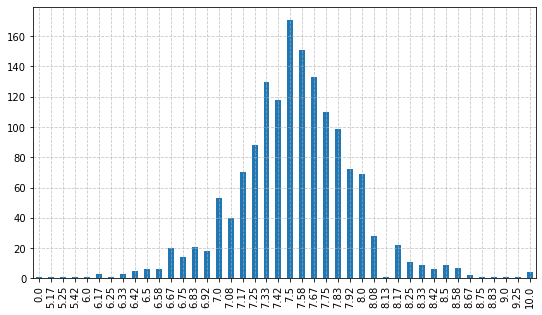

In [5]:
plt.figure(figsize = (9,5))
cupping_scores['Overall'].value_counts().sort_index().plot(kind = 'bar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Set an arbitrary cutoff for the dependent variable (Overall) at 7.51 or higher getting classified as `great or 1`, and the remainder as `average or 0`.

In [6]:
cupping_score = cupping_scores.copy()
cupping_score['Overall'] = cupping_score['Overall'].apply(lambda x: 1 if x > 7.5 else 0)
cupping_score.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Total_Cup_Points,Overall
0,7.83,7.92,7.75,8.00,7.75,7.75,10.0,10.0,10.0,84.92,1
1,7.58,7.83,7.58,7.75,7.67,7.75,10.0,10.0,10.0,83.92,1
2,7.67,7.83,7.67,7.83,7.75,7.67,10.0,10.0,10.0,84.08,1
3,7.58,7.92,7.67,7.75,7.83,7.75,10.0,10.0,10.0,84.25,1
4,7.67,7.83,7.75,7.75,7.83,7.75,10.0,10.0,10.0,84.33,1


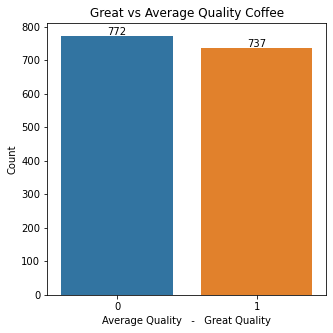

In [7]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Overall', data = cupping_score)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center')
plt.xlabel('Average Quality   -   Great Quality')
plt.ylabel('Count')
plt.title('Great vs Average Quality Coffee')
plt.show()

In [ ]:
ax = certification_info['Country_of_Origin'].value_counts().head(10).sort_values().plot(kind = 'barh', title = 'Top 10 Coffee Bean Country of origin counts')
ax

### 💡 Relationship Features

In [ ]:
#check for data correlations
plt.figure(figsize=(20,20))
cq_corr = df.corr(method='pearson')
sns.heatmap(cq_corr, annot = True)

The confusion matrix abow shows the highest correlation between 'aroma with flavor', flavor with aftertase', 'acidity with flavor', 'body with total cup points', 'balance with total cup points', 'overall with flavor' and 'total cup points with flavor'. As for the 'flavor with aftertaste' it isn't necessary to explain it in depth, but in summary, the relationship between them shows that the amount of flavor of a coffee bean, will give them an aftertaste, without regard if what flavor the bean is.

In [ ]:
sns.pairplot(cupping_scores, vars = ['Aroma','Flavor','Aftertaste','Acidity','Body'], hue = certification_info['Processing_Method'])

In [ ]:
ax = sns.scatterplot(x = 'Flavor', y = 'Aftertaste', hue = certification_info['Processing_Method'], data = cupping_scores)
sns.move_legend(ax, 'upper left', bbox_to_anchor = (1, 1))
ax.set_title('Flavor vs Aftertaste')

### ❔Question ponder

* What Processing Method has a highest number of defects categorized as "Category Two."?
* What type of coffee beans has a highest rating for the acidity of the coffee?
* What type of coffee beans has a highest rating for the aroma of the coffee?
* What type of coffee beans has a highest rating for the Aftertaste of the coffee?

In [ ]:
axis = df.query('Processing_Method != "Other"').groupby('Processing_Method')['Category_Two_Defects'].agg(['mean']) \
       .sort_values('mean')['mean'].plot(kind = 'barh', figsize = (12, 5), title = 'Processing Method with the highest number of defect(Category_2)')
axis.set_xlabel('Category_Two_Defects')

In [ ]:
axis = df.query('Variety != "Other"').groupby('Variety')['Acidity'].agg(['mean']) \
       .sort_values('mean')['mean'].head(10).plot(kind = 'barh', figsize = (12, 5), title = 'Type of coffee beans with the highest acidity rating')
axis.set_xlabel('Acidity')

In [ ]:
axis = df.query('Variety != "Other"').groupby('Variety')['Aroma'].agg(['mean']) \
       .sort_values('mean')['mean'].head(10).plot(kind = 'barh', figsize = (12, 5), title = 'Type of coffee beans with the highest aroma rating')
axis.set_xlabel('Aroma')

In [ ]:
axis = df.query('Variety != "Other"').groupby('Variety')['Aftertaste'].agg(['mean']) \
       .sort_values('mean')['mean'].head(10).plot(kind = 'barh', figsize = (12, 5), title = 'Type of coffee beans with the highest Aftertaste rating')
axis.set_xlabel('Aftertaste')

## **💡 Highlights of the Results**

**3 highlights after implementing kNN algorithm:**
1. The optimal no. of neighbors is 11 with an accuracy score of **88%**
2. The test accuracy exceeded the required 1.25PCC target accuracy of **62.53%**.
3. The features that affect the target most are `Flavor`, `Aftertaste`, and `Balance`.

## **🤖 kNN Implementation**

In [9]:
X = cupping_score.drop('Overall', axis = 1)
y = cupping_score['Overall']

Best Accuracy for KNN: 0.88


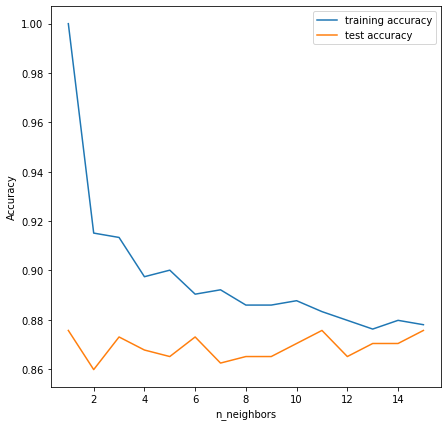

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize = (7,7))    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(f"Best Accuracy for KNN: {np.max(test_accuracy):.2f}")

### **📝 Evaluate Model Performance**

In [11]:
knn_pred = knn.predict(X_test)

In [12]:
print("K Nearest Neighbors Classifier:")
print("Classification Report:\n", classification_report(y_test, knn_pred))

K Nearest Neighbors Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       188
           1       0.89      0.86      0.87       190

    accuracy                           0.88       378
   macro avg       0.88      0.88      0.88       378
weighted avg       0.88      0.88      0.88       378



### Proportion Chance Criteria

In [13]:
def PCC(target, plot=True, title=None):
    
    state_counts = Counter(cupping_score['Overall'])
    df_state = pd.DataFrame.from_dict(state_counts, orient='index')
    num = (df_state[0]/df_state[0].sum())**2
    ret = 1.25*100*num.sum()
    
    if plot == True:
        plt.figure(figsize=(6,5))
        ax = sns.countplot(x=target)
        plt.title(f"{title}\n(1.25 PCC = {ret}%)", fontsize=15)
        plt.xticks(ticks=range(2), labels=['Average', 'Great'])
        plt.show()

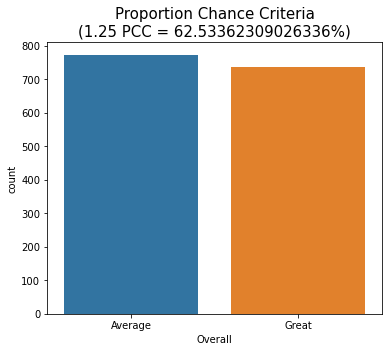

In [14]:
PCC(y, title="Proportion Chance Criteria")

## 📜**Discussion of Results**

### Top Features

In [15]:
print('Features with their corresponding correlation values to the target variable:\n\nFeature\t            Correlation')
print('-'*32)
print(cupping_score.corr().Overall[cupping_score.corr()[cupping_score.columns[-1]].abs().index.tolist()
                             [:-1]].sort_values(ascending=False))

Features with their corresponding correlation values to the target variable:

Feature	            Correlation
--------------------------------
Flavor              0.553295
Aftertaste          0.551368
Balance             0.526832
Acidity             0.486445
Total_Cup_Points    0.482450
Body                0.455300
Aroma               0.449248
Clean_Cup           0.120387
Uniformity          0.111149
Sweetness           0.062037
Name: Overall, dtype: float64


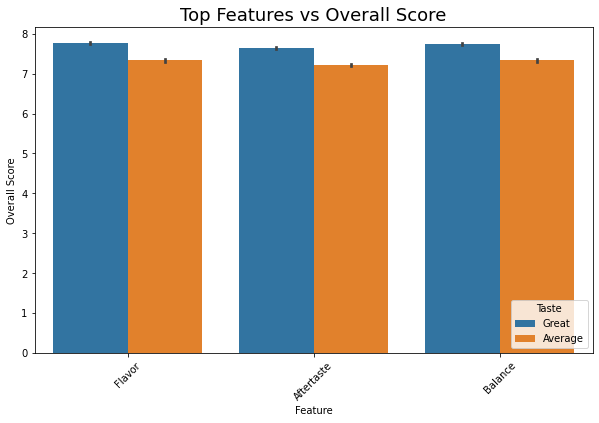

In [16]:
top_features = cupping_score[['Flavor', 'Aftertaste', 'Balance', 'Overall']]
overall_score = ['Average', 'Great']

div = pd.melt(top_features, id_vars='Overall', var_name='Feature', value_name='Score')
div.loc[div.Overall==1,'Overall'] = 'Great'
div.loc[div.Overall==0,'Overall'] = 'Average'

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Score', hue='Overall', data=div)
plt.title('Top Features vs Overall Score', fontsize=18)
plt.xlabel('Feature')
plt.ylabel('Overall Score')
plt.xticks(rotation=45)
plt.legend(title='Taste', loc=4)
plt.show()

### Additional Insights from Certification Information

In [17]:
coffee = pd.concat([certification_info, cupping_score], axis=1)
great = coffee[coffee['Overall'] == 1]

In [18]:
print('_'*115)
print()
print('\033[1mThe country where most of the highest-quality coffee beans were grown:', 
      great['Country_of_Origin'].value_counts().idxmax())
print()
print('\033[0mTop 10 countries\t        Count')
print('-'*38)
print(great['Country_of_Origin'].value_counts().head(10))
print()
print('_'*115)
print()
print('\033[1mThe region or geographical area where most of the highest-quality coffee beans were produced:', 
      great['Region'].value_counts().idxmax())
print()
print('\033[0mTop 5 regions\t  Count')
print('-'*24)
print(great['Region'].value_counts().head(5))
print()
print('_'*115)
print()
print('\033[1mThe altitude at which most of the highest-quality coffee beans were grown:', 
      great['Altitude'].value_counts().idxmax())
print()
print('\033[0mAltitude  Count')
print('-'*15)
print(great['Altitude'].value_counts().head(5))
print()
print('_'*115)
print()
print('\033[1mThe variety or type of coffee beans with the highest-quality:', 
      great['Variety'].value_counts().idxmax())
print()
print('\033[0mTypes\t   Count')
print('-'*16)
print(great['Variety'].value_counts().head(3))
print()
print('_'*115)
print()
print('\033[1mThe company or organization where most of the highest-quality coffee beans were processed:',
      great['Company'].value_counts().idxmax())
print()
print('\033[0mTop 5 companies\t                  Count')
print('-'*39)
print(great['Company'].value_counts().head(5))
print()
print('_'*115)
print()
print('\033[1mThe processing method that resulted in most of the highest-quality coffee beans:', 
      great['Processing_Method'].value_counts().idxmax())
print()
print('\033[0mTop 4 processing methods     Count')
print('-'*34)
print(great['Processing_Method'].value_counts().head(4))
print()
print('_'*115)
print()
print('\033[1mThe color of the highest-quality coffee bean:', great['Color'].value_counts().idxmax())
print()
print('\033[0mTop 3 colors    Count')
print('-'*21)
print(great['Color'].value_counts().head(3))
print()
print('_'*115)
print()
print('\033[1mThe moisture content of the highest-quality coffee bean:', great['Moisture'].value_counts().idxmax())
print()
print('\033[0mMoisture Count')
print('-'*14)
print(great['Moisture'].value_counts().head(5))

___________________________________________________________________________________________________________________

The country where most of the highest-quality coffee beans were grown: Colombia

Top 10 countries	        Count
--------------------------------------
Colombia                        135
Taiwan                           76
Guatemala                        75
Mexico                           72
Brazil                           63
Ethiopia                         52
United States (Hawaii)           41
Costa Rica                       39
Uganda                           24
Tanzania, United Republic Of     23
Name: Country_of_Origin, dtype: int64

___________________________________________________________________________________________________________________

The region or geographical area where most of the highest-quality coffee beans were produced: huila

Top 5 regions	  Count
------------------------
huila             74
south of minas    33
kona              33
orien